# Confidence Interval Test for Confined Aquifers
**Synthetic data**

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from ttim import *

Set basic parameters for the model:

In [3]:
H = 7 #aquifer thickness
k = 70 #hydraulic conductivity
S = 1e-4 #specific storage
Q = 788 #constant discharge
d1 = 30 #observation well 1
d2 = 90 #observation well 2 (positions same as for Oude Korendijk)

Load data of test site 'Oude Korendijk':

In [4]:
data1 = np.loadtxt('data/piezometer_h30.txt', skiprows = 1)
t = data1[:, 0] / 60 / 24 # convert min to days

Create conceptual model:

In [5]:
ml = ModelMaq(kaq=70, z =[-18, -25], Saq=1e-4, tmin=1e-5, tmax=1)
w = Well(ml, xw=0, yw=0, rw=0.1, tsandQ=[(0, 788)])
ml.solve(silent='True')
h1 = ml.head(d1, 0, t)
h2 = ml.head(d2, 0, t)

Add noises:

In [6]:
np.savetxt('data/syn_30_0.0.txt', h1[0])
np.savetxt('data/syn_90_0.0.txt', h2[0])
#print(h2[0])

In [7]:
np.random.seed(5)
he12 = h1[0] - np.random.randn(len(t)) * 0.02
he22 = h2[0] - np.random.randn(len(t)) * 0.02
np.savetxt('data/syn_p30_0.02.txt', he12)
np.savetxt('data/syn_p90_0.02.txt', he22)

In [8]:
np.random.seed(4)
he15 = h1[0] - np.random.randn(len(t)) * 0.05
he25 = h2[0] - np.random.randn(len(t)) * 0.05
np.savetxt('data/syn_p30_0.05.txt', he15)
np.savetxt('data/syn_p90_0.05.txt', he25)

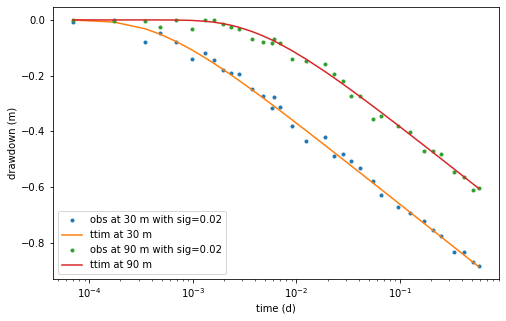

In [9]:
plt.figure(figsize=(8, 5))
plt.semilogx(t, he12, '.', label='obs at 30 m with sig=0.02')
plt.semilogx(t, h1[0], label='ttim at 30 m')
plt.semilogx(t, he22, '.', label='obs at 90 m with sig=0.02')
plt.semilogx(t, h2[0], label='ttim at 90 m')
plt.legend()
plt.xlabel('time (d)')
plt.ylabel('drawdown (m)');

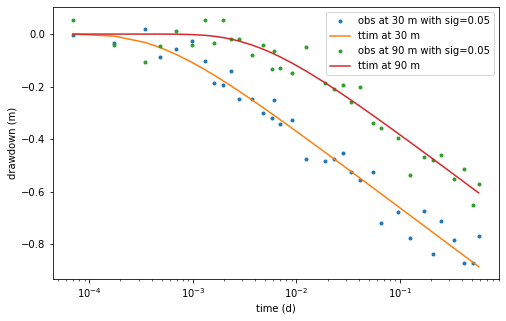

In [10]:
plt.figure(figsize=(8, 5))
plt.semilogx(t, he15, '.', label='obs at 30 m with sig=0.05')
plt.semilogx(t, h1[0], label='ttim at 30 m')
plt.semilogx(t, he25, '.', label='obs at 90 m with sig=0.05')
plt.semilogx(t, h2[0], label='ttim at 90 m')
plt.legend()
plt.xlabel('time (d)')
plt.ylabel('drawdown (m)');

#### Test if TTim finds the parameters back

Calibrate with two datasets respectively (0.02):

In [11]:
ca23 = Calibrate(ml)
ca23.set_parameter(name='kaq0', initial=10)
ca23.set_parameter(name='Saq0', initial=1e-3)
ca23.series(name='obs1', x=d1, y=0, t=t, h=he12, layer=0)
ca23.fit(report=True)
display(ca23.parameters)

...............................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 28
    # data points      = 34
    # variables        = 2
    chi-square         = 0.01117172
    reduced chi-square = 3.4912e-04
    Akaike info crit   = -268.704835
    Bayesian info crit = -265.652114
[[Variables]]
    kaq0:  69.9140554 +/- 1.09423921 (1.57%) (init = 10)
    Saq0:  1.0170e-04 +/- 5.4838e-06 (5.39%) (init = 0.001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.852


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,69.9141,1.094239,1.56512,-inf,inf,10,[69.91405544705488]
Saq0,0.000101704,0.000005,5.39192,-inf,inf,0.001,[0.00010170395030742693]


rmse: 0.018126773873208015


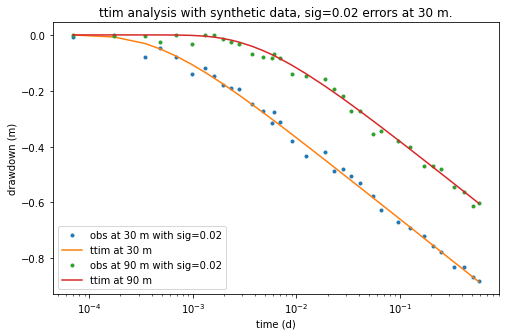

In [12]:
print('rmse:', ca23.rmse())
h123 = ml.head(d1, 0, t)
h223 = ml.head(d2, 0 ,t)
plt.figure(figsize = (8, 5))
plt.semilogx(t, he12, '.', label='obs at 30 m with sig=0.02')
plt.semilogx(t, h123[0], label='ttim at 30 m')
plt.semilogx(t, he22, '.', label='obs at 90 m with sig=0.02')
plt.semilogx(t, h223[0], label='ttim at 90 m')
plt.xlabel('time (d)')
plt.ylabel('drawdown (m)')
plt.title('ttim analysis with synthetic data, sig=0.02 errors at 30 m.')
plt.legend();

In [13]:
ca29 = Calibrate(ml)
ca29.set_parameter(name='kaq0', initial=10)
ca29.set_parameter(name='Saq0', initial=1e-3)
ca29.series(name='obs2', x=d2, y=0, t=t, h=he22, layer=0)
ca29.fit(report=True)
display(ca29.parameters)

...................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 32
    # data points      = 34
    # variables        = 2
    chi-square         = 0.00859548
    reduced chi-square = 2.6861e-04
    Akaike info crit   = -277.617899
    Bayesian info crit = -274.565178
[[Variables]]
    kaq0:  70.7905694 +/- 1.71073318 (2.42%) (init = 10)
    Saq0:  9.3336e-05 +/- 5.1366e-06 (5.50%) (init = 0.001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.831


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,70.7906,1.710733,2.41661,-inf,inf,10,[70.79056943573127]
Saq0,9.33358e-05,0.000005,5.50339,-inf,inf,0.001,[9.333583047877941e-05]


rmse: 0.015899943980017286


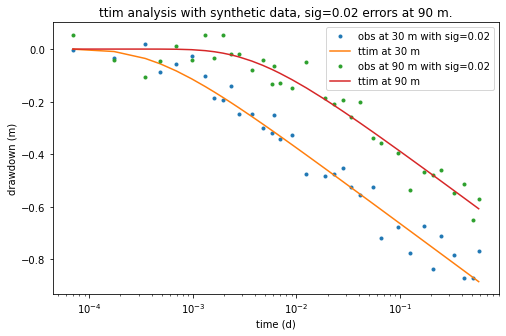

In [14]:
print('rmse:', ca29.rmse())
h129 = ml.head(d1, 0, t)
h229 = ml.head(d2, 0, t)
plt.figure(figsize = (8, 5))
plt.semilogx(t, he15, '.', label='obs at 30 m with sig=0.02')
plt.semilogx(t, h129[0], label='ttim at 30 m')
plt.semilogx(t, he25, '.', label='obs at 90 m with sig=0.02')
plt.semilogx(t, h229[0], label='ttim at 90 m')
plt.legend()
plt.xlabel('time (d)')
plt.ylabel('drawdown (m)');
plt.title('ttim analysis with synthetic data, sig=0.02 errors at 90 m.')
plt.legend(loc = 'best');

#### Calibrate with two datasets simultaneously

Drawdown without errors:

In [15]:
ca0 = Calibrate(ml)
ca0.set_parameter(name='kaq0', initial=10)
ca0.set_parameter(name='Saq0', initial=1e-3)
ca0.series(name='obs1', x=d1, y=0, t=t, h=h1[0], layer=0)
ca0.series(name='obs2', x=d2, y=0, t=t, h=h2[0], layer=0)
ca0.fit(report=True)
display(ca0.parameters)

............................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 68
    # variables        = 2
    chi-square         = 1.3439e-14
    reduced chi-square = 2.0362e-16
    Akaike info crit   = -2454.88865
    Bayesian info crit = -2450.44964
[[Variables]]
    kaq0:  69.9999992 +/- 6.9243e-07 (0.00%) (init = 10)
    Saq0:  1.0000e-04 +/- 2.9989e-12 (0.00%) (init = 0.001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.830


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,70,6.924296e-07,9.89185e-07,-inf,inf,10,[69.99999923293925]
Saq0,0.0001,2.998903e-12,2.9989e-06,-inf,inf,0.001,[0.00010000000167342676]


rmse: 1.405814859967026e-08


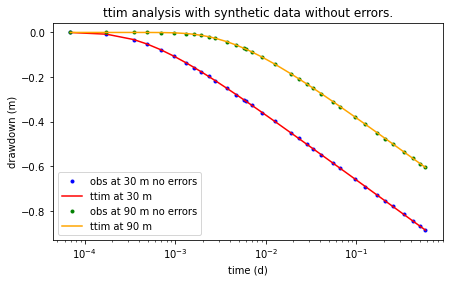

In [16]:
print('rmse:', ca0.rmse())
h1n = ml.head(d1, 0, t)
h2n = ml.head(d2, 0, t)
plt.figure(figsize = (7, 4))
plt.semilogx(t, h1[0], 'b.', label='obs at 30 m no errors')
plt.semilogx(t, h1n[0], color = 'r', label = 'ttim at 30 m')
plt.semilogx(t, h2[0], 'g.', label='obs at 90 m no errors')
plt.semilogx(t, h2n[0], color='orange', label = 'ttim at 90 m')
plt.xlabel('time (d)')
plt.ylabel('drawdown (m)')
plt.title('ttim analysis with synthetic data without errors.')
plt.legend();

Drawdowns with errors with $\sigma=0.02$.

In [17]:
ca2 = Calibrate(ml)
ca2.set_parameter(name='kaq0', initial=10)
ca2.set_parameter(name='Saq0', initial=1e-3)
ca2.series(name='obs1', x=d1, y=0, t=t, h=he12, layer=0)
ca2.series(name='obs2', x=d2, y=0, t=t, h=he22, layer=0)
ca2.fit()
display(ca2.parameters)

...............................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 28
    # data points      = 68
    # variables        = 2
    chi-square         = 0.02036601
    reduced chi-square = 3.0858e-04
    Akaike info crit   = -547.710917
    Bayesian info crit = -543.271902
[[Variables]]
    kaq0:  70.5088065 +/- 0.85773044 (1.22%) (init = 10)
    Saq0:  9.7105e-05 +/- 3.6048e-06 (3.71%) (init = 0.001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.830


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,70.5088,0.857730,1.21649,-inf,inf,10,[70.5088065318829]
Saq0,9.71049e-05,0.000004,3.71231,-inf,inf,0.001,[9.710489541232362e-05]


rmse: 0.01730607089294998


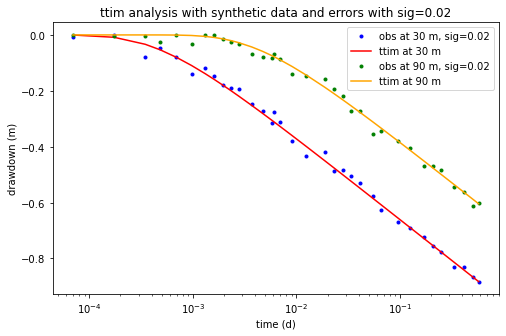

In [18]:
print('rmse:', ca2.rmse())
h12 = ml.head(d1, 0, t)
h22 = ml.head(d2, 0, t)
plt.figure(figsize = (8, 5))
plt.semilogx(t, he12, 'b.', label='obs at 30 m, sig=0.02')
plt.semilogx(t, h12[0], color = 'r', label = 'ttim at 30 m')
plt.semilogx(t, he22, 'g.', label='obs at 90 m, sig=0.02')
plt.semilogx(t, h22[0], color='orange', label = 'ttim at 90 m')
plt.xlabel('time (d)')
plt.ylabel('drawdown (m)')
plt.title('ttim analysis with synthetic data and errors with sig=0.02')
plt.legend();

Drawdowns with errors with $\sigma=0.05$.

In [19]:
ca5 = Calibrate(ml)
ca5.set_parameter(name='kaq0', initial=10)
ca5.set_parameter(name='Saq0', initial=1e-3)
ca5.series(name='obs1', x=d1, y=0, t=t, h=he15, layer=0)
ca5.series(name='obs2', x=d2, y=0, t=t, h=he25, layer=0)
ca5.fit()
display(ca5.parameters)

.............................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 26
    # data points      = 68
    # variables        = 2
    chi-square         = 0.16477215
    reduced chi-square = 0.00249655
    Akaike info crit   = -405.543556
    Bayesian info crit = -401.104541
[[Variables]]
    kaq0:  70.3178524 +/- 2.43432112 (3.46%) (init = 10)
    Saq0:  9.8231e-05 +/- 1.0351e-05 (10.54%) (init = 0.001)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq0, Saq0) = -0.830


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,70.3179,2.434321,3.46188,-inf,inf,10,[70.3178524383838]
Saq0,9.82307e-05,0.000010,10.5376,-inf,inf,0.001,[9.823070103722924e-05]


rmse: 0.04922519578206107


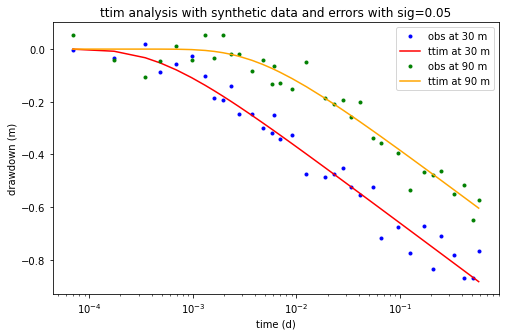

In [20]:
print('rmse:', ca5.rmse())
h15 = ml.head(d1, 0, t)
h25 = ml.head(d2, 0, t)
plt.figure(figsize=(8, 5))
plt.semilogx(t, he15, 'b.', label='obs at 30 m')
plt.semilogx(t, h15[0], color = 'r', label = 'ttim at 30 m')
plt.semilogx(t, he25, 'g.', label='obs at 90 m')
plt.semilogx(t, h25[0], color='orange', label = 'ttim at 90 m')
plt.xlabel('time (d)')
plt.ylabel('drawdown (m)')
plt.title('ttim analysis with synthetic data and errors with sig=0.05')
plt.legend();